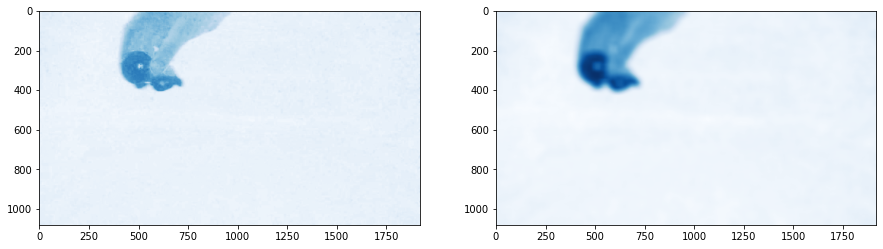

In [142]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('baby_turtle.jpg')
img = np.flip(img, axis=2)
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
turtle_H = img_hsv[:,:,0]
turtle_S = img_hsv[:,:,1]
turtle_V = img_hsv[:,:,2]

sfilt = cv2.boxFilter(img_hsv[:, :, 1], cv2.CV_32F, (40, 40))

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(turtle_S, cmap='Blues')
ax[1].imshow(sfilt, cmap='Blues') # Saturation: turtle stands out most
plt.show()

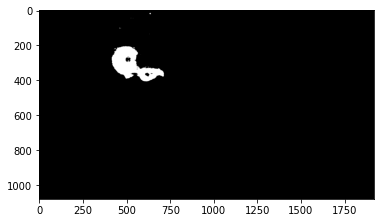

In [143]:
"""
Compare the SNR in the two images (before (B) and after (A) I applied box filter) by finding and squaring the max value of the hue on the turtle body and dividing by the variance of the image background, which
you can approximate by selecting a section of the image that is considered
background and calculating the variance among those pixels. Does the calculation
agree with what you see in the images?
"""
img_thresh_sat = np.logical_and(turtle_S > 140, turtle_S < 255)
fig, ax = plt.subplots()
ax.imshow(img_thresh_sat, cmap='gray')
plt.show()

In [144]:
(turtle_S * img_thresh_sat).shape

(1080, 1920)

In [145]:
signal_max = np.max(turtle_S * img_thresh_sat) # the argument is an array of saturation values for pixels detected as part of turtle
signal_max

242

In [146]:
np.unique(turtle_S * img_thresh_sat) 

array([  0, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 194, 195, 196, 197, 199, 202, 203, 210, 226, 235, 242],
      dtype=uint8)

In [147]:
not_img_thresh_sat = np.logical_not(img_thresh_sat)
not_img_thresh_sat.shape

(1080, 1920)

In [148]:
np.mean(turtle_S * not_img_thresh_sat)

31.644411651234567

In [149]:
variance = np.var(turtle_S * not_img_thresh_sat - np.mean(turtle_S * not_img_thresh_sat)) # the argument is an array of saturation values for pixels detected as background. We subtract mean because the np.var() function requires the mean of noise to be 0
variance

344.26992652498757

In [150]:
SNR = signal_max ** 2 / variance
SNR

170.11070525717076

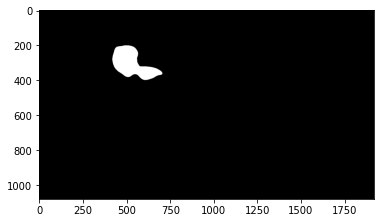

In [151]:
"""
SNR after (A) I applied box filter. find and square the max value of the hue on the turtle body and dividing by the variance of the image background, which
you can approximate by selecting a section of the image that is considered
background and calculating the variance among those pixels. Does the calculation
agree with what you see in the images?
"""
img_thresh_sat_A = np.logical_and(sfilt > 130, sfilt < 255)
fig, ax = plt.subplots()
ax.imshow(img_thresh_sat_B, cmap='gray')
plt.show()

In [152]:
signal_max_A = np.max(sfilt * img_thresh_sat_A) # the argument is an array of saturation values for pixels detected as part of turtle
signal_max_A

180.48688

In [153]:
np.unique(sfilt * img_thresh_sat_A) 

array([  0.     , 130.00313, 130.00499, ..., 180.47374, 180.48   ,
       180.48688], dtype=float32)

In [154]:
not_img_thresh_sat = np.logical_not(img_thresh_sat)

In [155]:
variance_A = np.var(sfilt * not_img_thresh_sat - np.mean(turtle_S * not_img_thresh_sat)) # the argument is an array of saturation values for pixels detected as background. We subtract mean because the np.var() function requires the mean of noise to be 0
variance_A

339.53638

In [156]:
SNR_A = signal_max_A ** 2 / variance_A # signal_max is not as much since we filtered. Variance is less
SNR_A

95.94115723584588

In [157]:
np.unique(sfilt)

array([ 20.17125 ,  20.174374,  20.186249, ..., 180.47374 , 180.48    ,
       180.48688 ], dtype=float32)

In [158]:
np.unique(turtle_S)

array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 19

# I calculated SNIR: signal to noise and interference ratio. Hand is interference. Plain background is noise
